In [1]:
import sys 
sys.path.append('../')
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
import torch.nn.functional as F
import scipy
import pandas as pd
import os
import glob
import scienceplots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.4e' % x)
# import seaborn as sns
from utils import create_expdf, fetch_subdf
from dataset.generate_dataset_1d import poisson_kernel, logarithm_kernel
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# load data
gn_log_df = pd.read_csv('../results/logarithm/GN1D-rational-513-50-1.0000-none-2/hist.csv')
gnaug2_log_df = pd.read_csv('../results/logarithm/GN1D-rational-513-50-1.0000-aug2-2/hist.csv')
gn_log_kernel = np.load('../results/logarithm/GN1D-rational-513-50-1.0000-none-2/approx_kernel.npy')
gnaug2_log_kernel = np.load('../results/logarithm/GN1D-rational-513-50-1.0000-aug2-2/approx_kernel.npy')

# process green's function
idx = 257
nh = 513
h = 2/(nh-1) # x in [-1, 1]
xh = torch.linspace(-1,1,nh)
x_i = torch.cartesian_prod(xh, xh)
G = logarithm_kernel(x_i[:,0], x_i[:,1], h).numpy()#.reshape(nh, nh)
G_gn = gn_log_kernel.reshape(-1)/h #.reshape(513,513) / h
G_gnaug2 = gnaug2_log_kernel/h #.reshape(513,513) / h

GL-aug Green's Function

In [5]:
G.min(), G.max()

(-6.238327, 1.6931763)

In [7]:
levels =  np.linspace(-6.5,1.7,30)

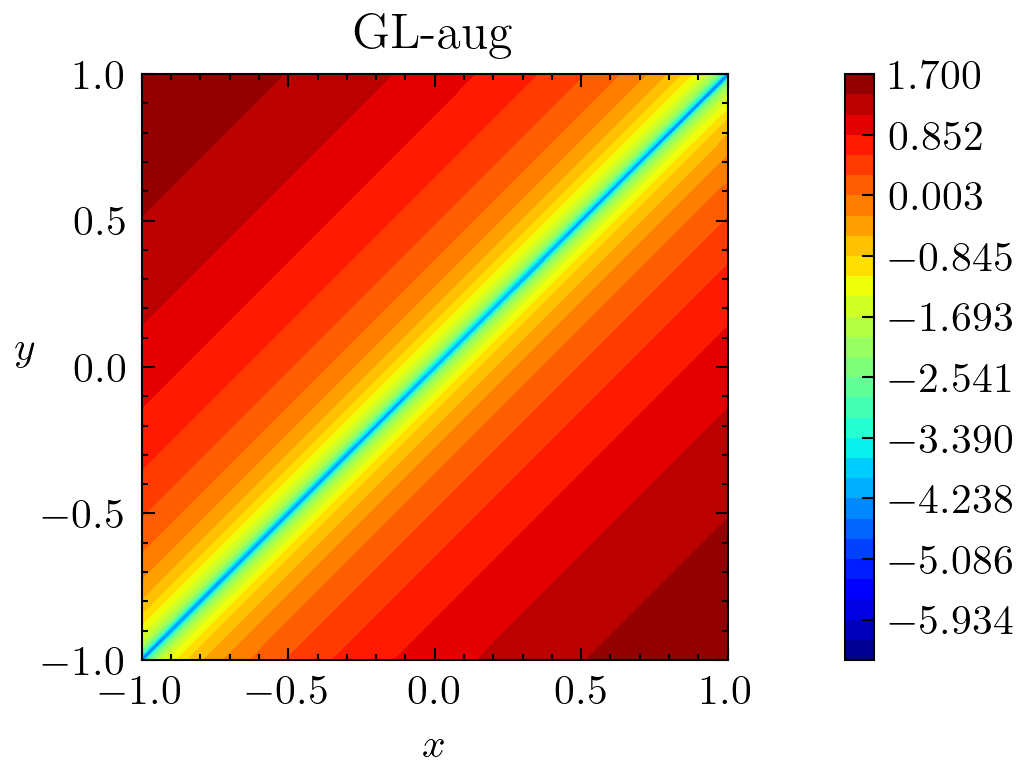

In [8]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gnaug2.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './logarithm1d_GL-aug.png'
plt.savefig(outnm)

GL Green's Function

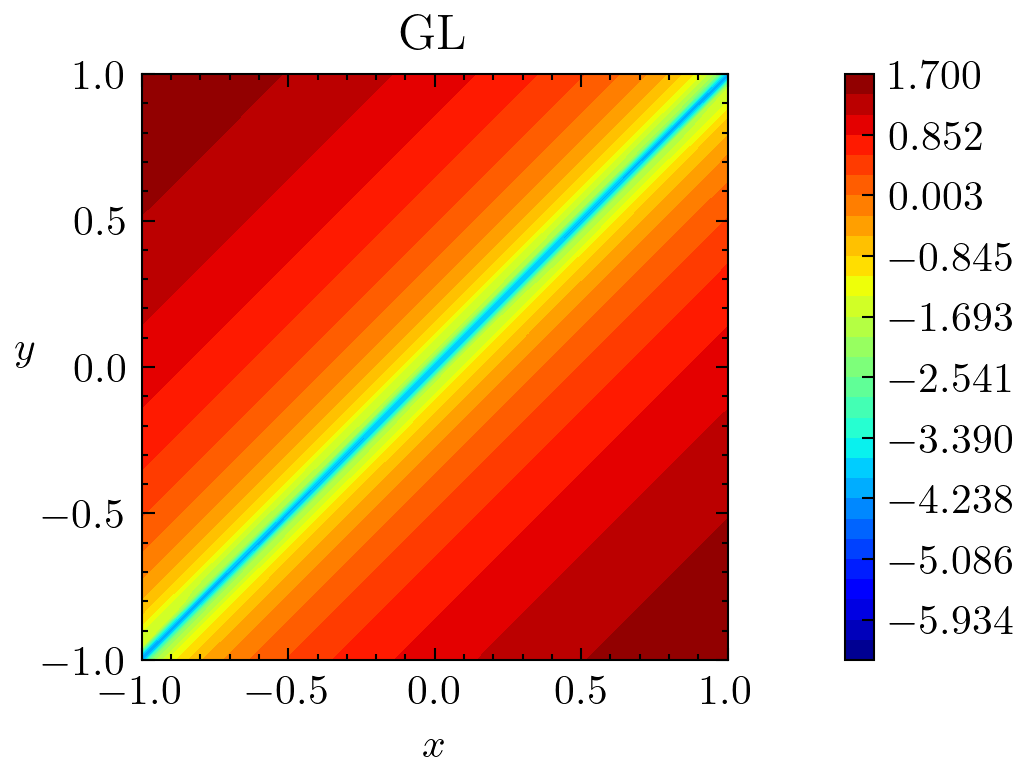

In [9]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G_gn.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './logarithm1d_GL.png'
plt.savefig(outnm)

Exact Green's Function

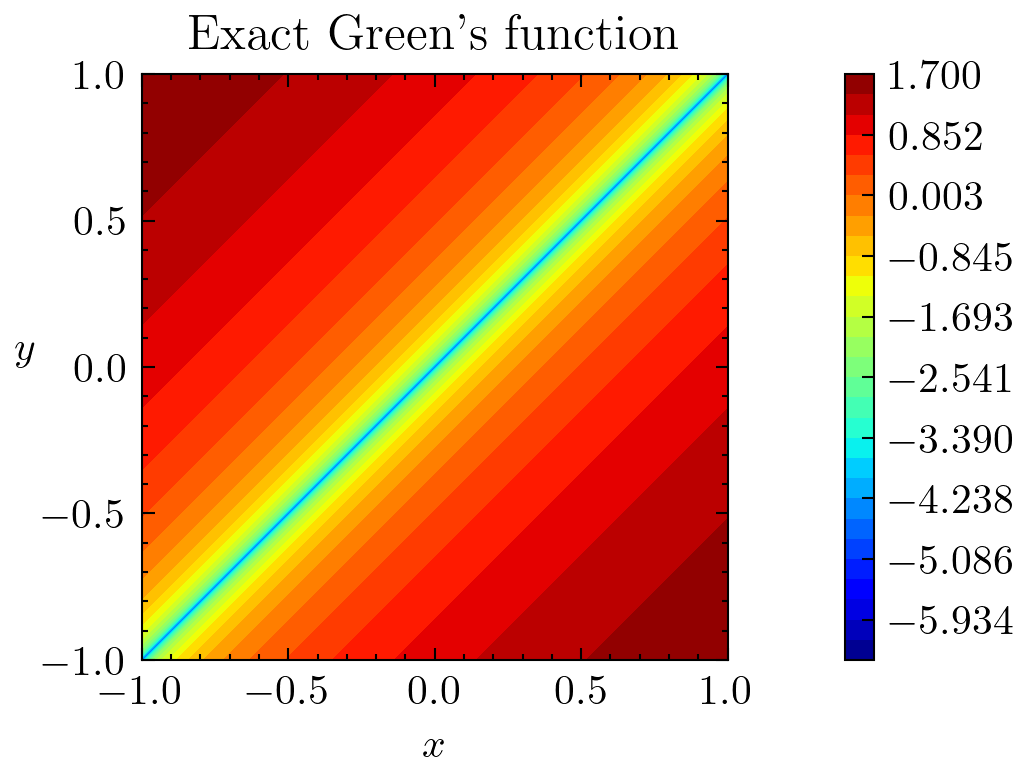

In [10]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh),
    G.reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Exact Green\'s function')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './logarithm1d_Exact.png'
plt.savefig(outnm)

GL-aug Error

In [16]:
levels = np.linspace(0, 1.5, 30)

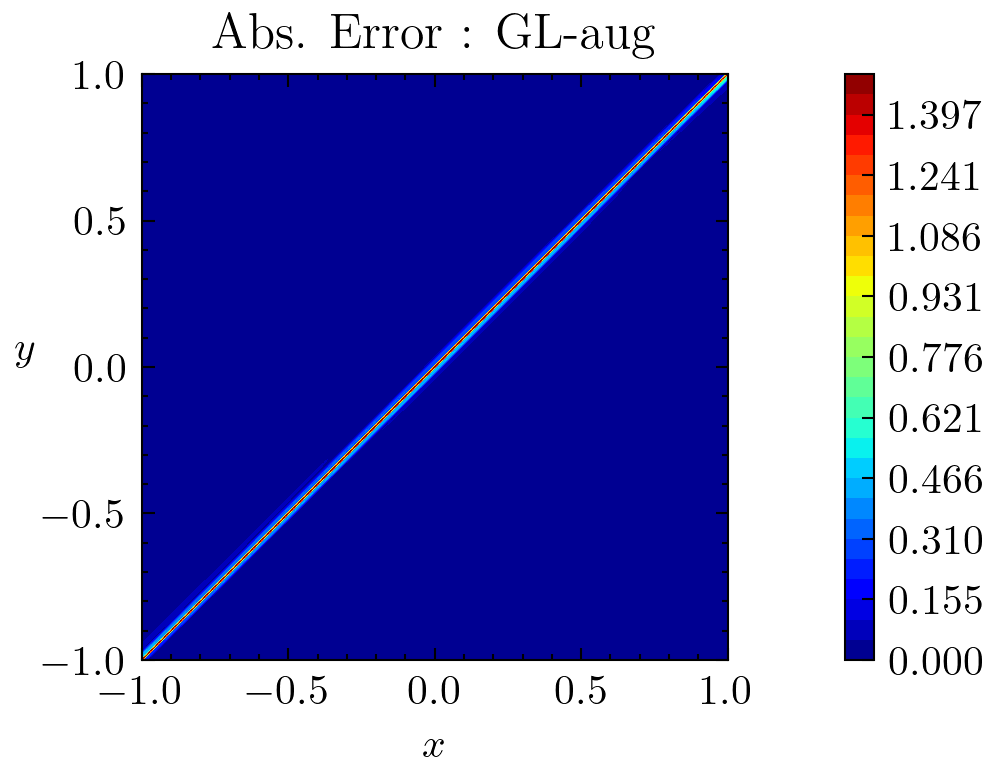

In [17]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_gnaug2-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Abs. Error : GL-aug')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './logarithm1d_GL-aug_err.png'
plt.savefig(outnm)

GL Error

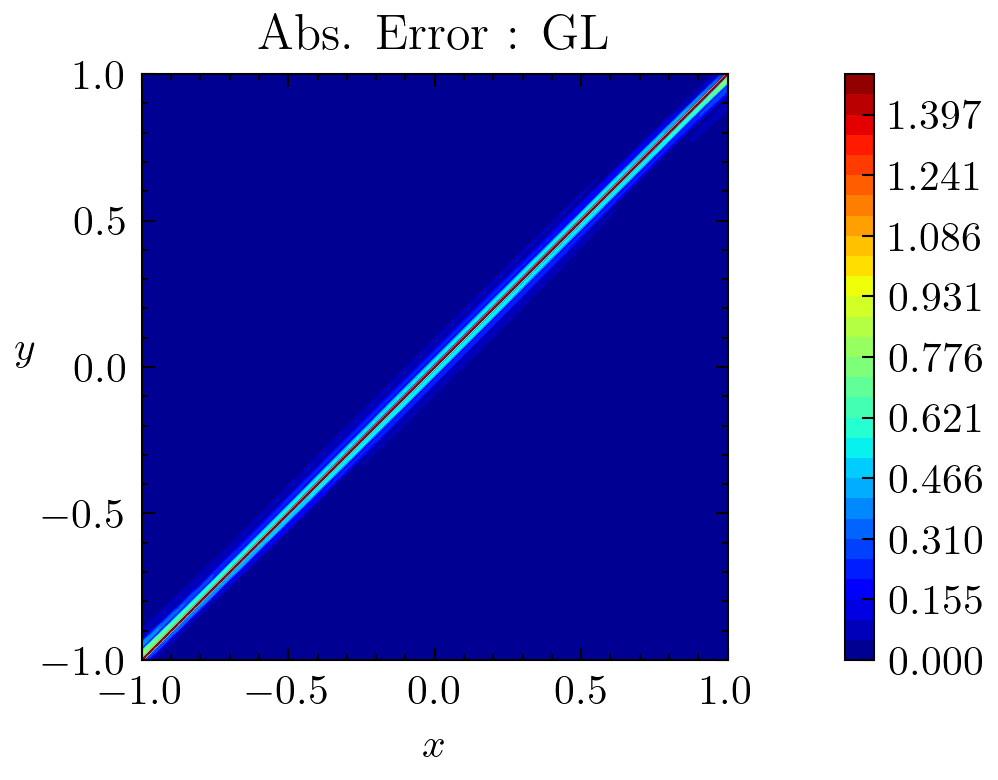

In [18]:
cm = 1/2.54
f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
im = ax.contourf(
    x_i[:,0].reshape(nh,nh), x_i[:,1].reshape(nh,nh), 
    np.abs(G_gn-G).reshape(nh,nh), levels=levels, cmap='jet')
ax.set_title('Abs. Error : GL')
ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$', rotation=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%')#, pad=0.2)
cbar = f.colorbar(im, cax=cax, orientation='vertical')
cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)
outnm = './logarithm1d_GL_err.png'
plt.savefig(outnm)

GL/GL-aug compare at x=0.5

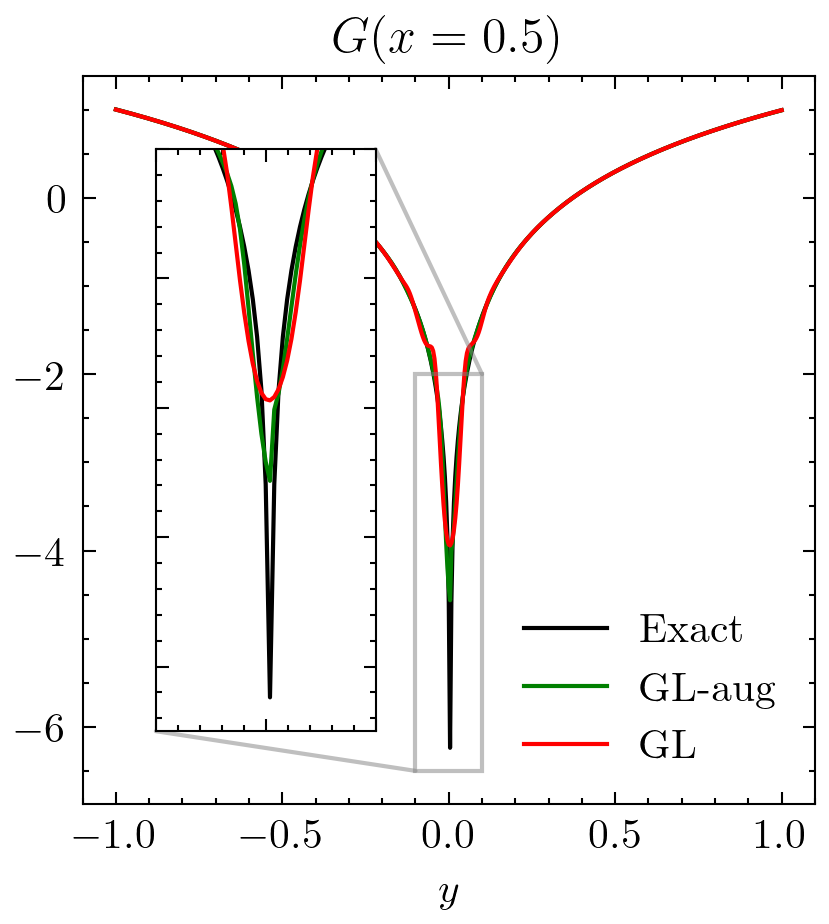

In [30]:
# visualize kernel slice
G_ = G.reshape(nh,nh)[idx]
G_gn_ = G_gn.reshape(nh,nh)[idx]
G_gnaug2_ = G_gnaug2.reshape(nh,nh)[idx]

f = plt.figure(figsize=(8*cm, 8*cm))
ax = f.add_subplot()
ax.plot(xh, G_, '-k',label='Exact')
ax.plot(xh, G_gnaug2_, '-g',label='GL-aug')
ax.plot(xh, G_gn_, '-r', label='GL')
ax.title.set_text('$G(x=0.5)$')
ax.set_xlabel('$y$')
axins = ax.inset_axes(
    [0.1, 0.1, 0.3, 0.8], xlim=(-0.1, 0.1),ylim=(-6.5,-2),
    xticklabels=[], yticklabels=[])
axins.plot(xh, G_, '-k', label='analytic')
axins.plot(xh, G_gnaug2_, '-g', label='GL-aug')
axins.plot(xh, G_gn_, '-r', label='GL')
ax.indicate_inset_zoom(axins)
ax.legend(loc='lower right')

outnm = './logarithm1d_slice.png'
plt.savefig(outnm)